## 引言
+ 问：现在的深度学习和机器学习用的已经很多了，为什么还要学习经典机器学习？答：没有一种方法能够解决世界上所有的问题，一种方法有其劣势，也有其优势。我们解决问题时选择自己最擅长的方法，但是也要了解各种方法，旁证博引。
+ 问：为什么不是单一的一个模型存在，而是很对人提出不同的模型？答：机器学习是指通过一些方法，预测未来。不同的人对于世界的认识是不一样的。

#### How does this world run?!
+ Functionality 功能
+ Probability 概率
+ Imitating  模仿
+ Diversion 改道
+ Split spaces 分割空间
+ Collective intelligences 集体智慧

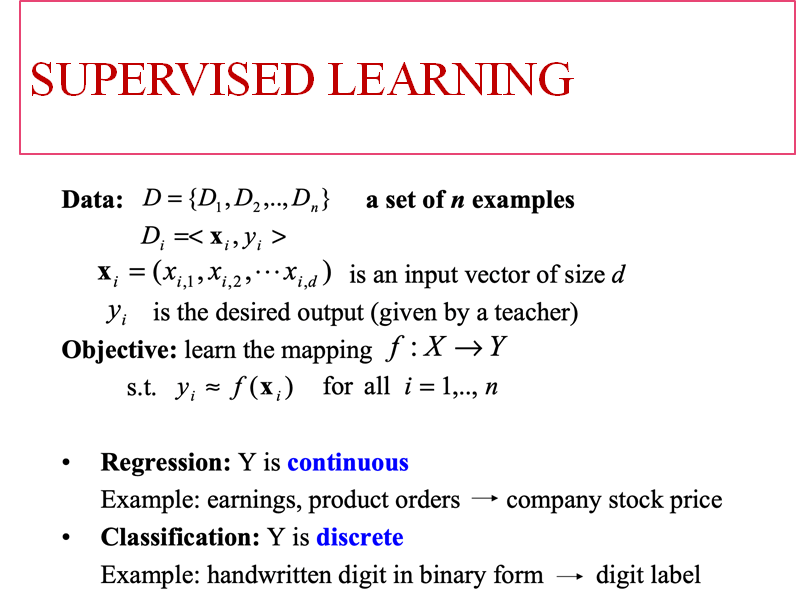

## 1.KNN
KNN -- K nearest neighbors -- K近邻

#### Regression

求$x'$处的$y$值，$x'$附近的点$x_1,x_2$对应的$y$值求平均可得

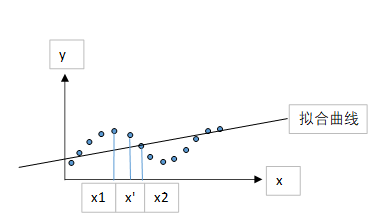

#### Classification

求圆圈的分类，圆圈附近的5个点中，有3个星形，2个正方形，圆圈属于个数多的类，即星形的类

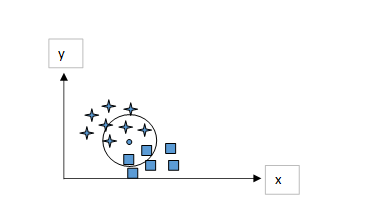

#### KNN python实现代码

$D=\{D_1,D_2,...,D_n\},D_i=\{x_i,y_i\}$

(xs,ys)=sort((xi,yi) for (xi,yi) in D,key=distance(xi,x'))[:,k]
+ if regression, ypred = np.mean(ys)
+ if classification, ypred = Counter(ys).most_commom()

#### 现实工作中存在问题：
+ 如果数据密度不均匀，可做加权平均或者加权投票
+ 对于不平衡unblance问题，可做以下处理：>加距离权重，进的权重大 >类别比例，少的权重大

有科学家在18年提出，最好的深度学习模型，其效果等于经过仔细调参后的KNN，Best Deep Learning = 精心调参够的KNN

#### 优点：
+ 容易实现、容易理解
+ 模型调整容易,可以方便得改变k的数量，或者给不同距离的k进行加权
+ 适合解决各种复杂问题（分类、回归、高纬、低纬、复杂关系、简单关系）

#### 缺点：
+ 运行时间久
+ 容易被异常值影响
+ 所需空间大
+ 高维空间的距离区分度不大

#### KNN model 构建模型时简单，预测时所花费的时间、空间巨大，典型的Lazy learning
+ Lazy learning:KNN
+ Eager learning:Logistic regression等，除了KNN外，基本都是

## 2.Decision tree / Random forest 

In [10]:
import numpy as np

In [11]:
from collections import Counter

In [12]:
def pr(e,es):
    return Counter(es)[e] / len(es)

In [13]:
def gini(elements):
    return 1-np.sum(pr(e,elements)**2 for e in set(elements))

In [17]:
def entorpy(elements):
    return -np.sum(pr(e,elements)*np.log2(pr(e,elements)) for e in set(elements))

In [20]:
features_1 = ['R','R','Y','Y']
features_2 = ['R','R','R','Y']
features_3 = ['R','R','R','R']

In [15]:
gini(features_1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.5

In [16]:
gini(features_2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.375

In [21]:
gini(features_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.0

In [18]:
entorpy(features_1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


1.0

In [19]:
entorpy(features_2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.8112781244591328

In [22]:
entorpy(features_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


-0.0

In [24]:
item_sales = {
    'gender':['F','F','F','F','M','M','M'],
    'income':['20','10','20','20','20','20','10'],
    'family_number':[1,1,2,1,1,1,2],
    'bought':[1,1,1,0,0,0,1],
}

In [25]:
import pandas as pd

In [27]:
dataset = pd.DataFrame.from_dict(item_sales)

In [28]:
dataset

,gender,income,family_number,bought
0,F,20,1,1
1,F,10,1,1
2,F,20,2,1
3,F,20,1,0
4,M,20,1,0
5,M,20,1,0
6,M,10,2,1


In [29]:
dataset.gender

0    F
1    F
2    F
3    F
4    M
5    M
6    M
Name: gender, dtype: object

In [30]:
dataset.columns

Index(['gender', 'income', 'family_number', 'bought'], dtype='object')

In [31]:
dataset['gender']

0    F
1    F
2    F
3    F
4    M
5    M
6    M
Name: gender, dtype: object

In [33]:
dataset['gender']=='F'

0     True
1     True
2     True
3     True
4    False
5    False
6    False
Name: gender, dtype: bool

In [35]:
dataset[dataset['gender']=='F']

,gender,income,family_number,bought
0,F,20,1,1
1,F,10,1,1
2,F,20,2,1
3,F,20,1,0


In [36]:
target = 'bought'

In [37]:
dataset[dataset['gender']=='F'][target]

0    1
1    1
2    1
3    0
Name: bought, dtype: int64

In [38]:
dataset[dataset['gender']=='F'][target].tolist()

[1, 1, 1, 0]

In [39]:
print(dataset[dataset['gender']=='F'][target].tolist(),dataset[dataset['gender']=='M'][target].tolist())

gini(dataset[dataset['gender']=='F'][target].tolist()) +\
gini(dataset[dataset['gender']=='M'][target].tolist())

[1, 1, 1, 0] [0, 0, 1]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.8194444444444444

In [40]:
print(dataset[dataset['income']=='20'][target].tolist(),dataset[dataset['income']=='10'][target].tolist())

gini(dataset[dataset['income']=='20'][target].tolist()) +\
gini(dataset[dataset['income']=='10'][target].tolist())

[1, 1, 0, 0, 0] [1, 1]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.48

#### 上述结果发现，收入为10的target都为1，收入为20的target有0有1，所以可以先判断收入，把收入为10的预测其target为1，再对收入为20的继续做判断，判断其他因素对收入为20的target的影响
#### 以上为决策树的构建原理
#### Gini系数以及Entropy反应的信息混乱程度
#### Loss = (m_left)/m * G_left + m_right / m * G_right ,Loss最小

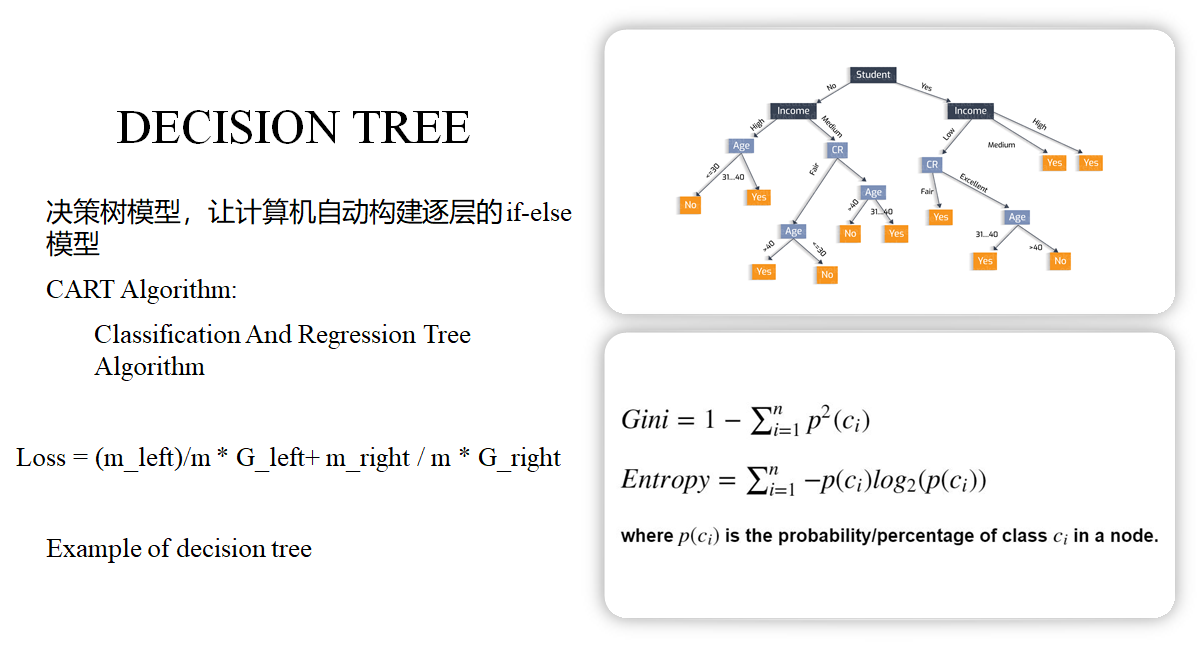

#### 决策树求解显著特征

In [41]:
from sklearn.datasets import load_boston

In [42]:
boston = load_boston()

In [43]:
X = boston.data

In [45]:
y = boston.target

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
tree_clf = DecisionTreeRegressor()

In [49]:
tree_clf.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
from sklearn.tree import export_graphviz

In [52]:
export_graphviz(
            tree_clf,
            out_file="boston.dot",
            feature_names=boston.feature_names,
            class_names=boston.target,
            rounded=True,
            filled=True)

In [53]:
for line in open('boston.dot'):
    print(line)

digraph Tree {

node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;

edge [fontname=helvetica] ;

0 [label="RM <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533", fillcolor="#f5ceb2"] ;

1 [label="LSTAT <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934", fillcolor="#f6d5bd"] ;

0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;

2 [label="DIS <= 1.385\nmse = 26.009\nsamples = 255\nvalue = 23.35", fillcolor="#f4ccae"] ;

1 -> 2 ;

3 [label="LSTAT <= 10.83\nmse = 78.146\nsamples = 5\nvalue = 45.58", fillcolor="#e88d4c"] ;

2 -> 3 ;

4 [label="mse = 0.0\nsamples = 4\nvalue = 50.0", fillcolor="#e58139"] ;

3 -> 4 ;

5 [label="mse = -0.0\nsamples = 1\nvalue = 27.9", fillcolor="#f2bf9a"] ;

3 -> 5 ;

6 [label="RM <= 6.543\nmse = 14.885\nsamples = 250\nvalue = 22.905", fillcolor="#f5cdb0"] ;

2 -> 6 ;

7 [label="LSTAT <= 7.57\nmse = 8.39\nsamples = 195\nvalue = 21.63", fillcolor="#f5d0b6"] ;

6 -> 7 ;

8 [label="TAX <= 222.5\nmse = 3.015\nsamples = 

In [54]:
tree_clf.feature_importances_

array([3.66569300e-02, 8.83207561e-04, 1.64278478e-03, 1.00775177e-03,
       4.91515622e-02, 5.90888659e-01, 1.28774505e-02, 7.36665390e-02,
       2.41953939e-04, 1.40797106e-02, 8.78194962e-03, 5.53063911e-03,
       2.04590862e-01])

In [56]:
{n:w for n,w in zip(boston.feature_names,tree_clf.feature_importances_)}

{'CRIM': 0.036656930014379564,
 'ZN': 0.0008832075606254904,
 'INDUS': 0.0016427847780240861,
 'CHAS': 0.0010077517736072177,
 'NOX': 0.049151562229154705,
 'RM': 0.5908886590520931,
 'AGE': 0.012877450451390373,
 'DIS': 0.07366653896442703,
 'RAD': 0.00024195393910999362,
 'TAX': 0.01407971059887247,
 'PTRATIO': 0.008781949620108252,
 'B': 0.005530639105541167,
 'LSTAT': 0.20459086191266673}

In [58]:
sorted({n:w for n,w in zip(boston.feature_names,tree_clf.feature_importances_)}.items(),key=lambda x:x[1],reverse=True)

[('RM', 0.5908886590520931),
 ('LSTAT', 0.20459086191266673),
 ('DIS', 0.07366653896442703),
 ('NOX', 0.049151562229154705),
 ('CRIM', 0.036656930014379564),
 ('TAX', 0.01407971059887247),
 ('AGE', 0.012877450451390373),
 ('PTRATIO', 0.008781949620108252),
 ('B', 0.005530639105541167),
 ('INDUS', 0.0016427847780240861),
 ('CHAS', 0.0010077517736072177),
 ('ZN', 0.0008832075606254904),
 ('RAD', 0.00024195393910999362)]

#### 上述结果得到了各维度的重要性，可以取前几个维度，用其他模型去预测结果，用决策树降维帮助其他模型
#### 决策树也可以做回归，loss函数是关于MSE的函数
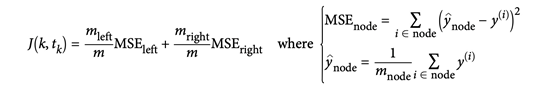

#### 优点：
1. clear to explain 结果可以清楚的解释，结果可以做可视化，有专门的的工具
2. could select salient features 可以根据树的结构，看其显著特征，如总共有100个特征，选最重要的10个特征用深度学习去拟合 

#### 缺点：
1. So sensitive 噪点影响大，容易过拟合
2. Fit ability is limited 拟合能力有限，当数据特别复杂，数据量很大，维度很高时，需要构建深度很深的树，特征分布比较均匀时，找不到比较强的特征

几乎所有的经典机器学习都有决策树的优缺点，线性回归代表的是深度学习用函数去拟合的流派

## 3.Support vector machine
## 5.Boosting 

## 4.Bayes classifier

+ 联合概率：$P(A,B) = P(A|B)P(B) = P(B|A)P(A)$
+ 贝叶斯公式：$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

根据上边两个公式求解下方例子：

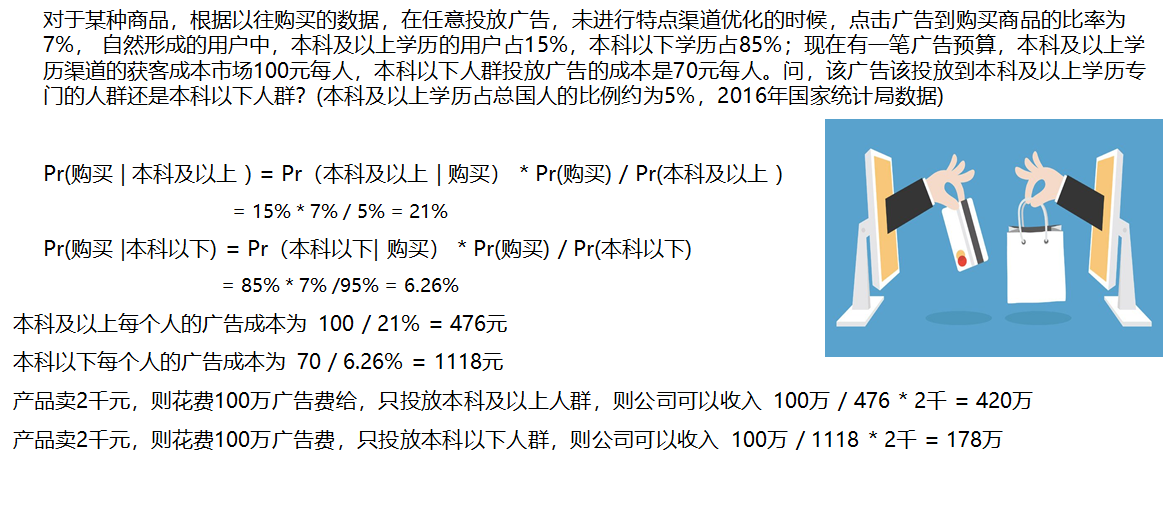

#### 已有历史邮件如下：

SPAM(垃圾邮件) = {Stext1,Stext2,…,Stextm};

Not SPAM(非垃圾邮件) = {Ntext1,Ntext2,…,NtextN};

现有新收邮件text={w1,w2,…,wn}，判断其为垃圾邮件还是非垃圾邮件	

要判断新收邮件text是否为垃圾邮件，只需根据历史数据判断：$P_r(SPAM|text),P_r(Not SPAM|text)$两个概率哪个大

$\begin{array}{ll}
    &P_r(SPAM|text)\\
    &=P_r(SPAM|w_1,w_2,…,w_n)\\
    &=\frac{P_r(w_1,w_2,…,w_n|SPAM)*P_r(SPAM)}{P_r(w_1,w_2,…,w_n)} （贝叶斯公式）\\
    &=\frac{P_r(w_1,w_2,…,w_n,SPAM)}{P_r(w_1,w_2,…,w_n)} （联合概率公式）\\
    &=\frac{P_r(w_1|w_2,…,w_n,SPAM)*P_r(w_2,…,w_n,SPAM)}{P_r(w_1,w_2,…,w_n)} （联合概率公式）\\
    &=\frac{P_r(w_1|w_2,…,w_n,SPAM)*P_r(w_2|w_3…,w_n,SPAM)*P_r(w_3…,w_n,SPAM)}{P_r(w_1,w_2,…,w_n)}\\
    &=...\\
    &=\frac{P_r(w_1|w_2,…,w_n,SPAM)*P_r(w_2|w_3…,w_n,SPAM)*...*P_r(w_n|SPAM)*P_r(SPAM)}{P_r(w_1,w_2,…,w_n)}\\
    &此处科学家做了大胆的假设，假设w_1只和是否是SPAM有关，和w_2,…,w_n无关，依此类推，可做如下简化\\
    &=\frac{P_r(w_1|SPAM)*P_r(w_2|SPAM)*...*P_r(w_n|SPAM)*P_r(SPAM)}{P_r(w_1,w_2,…,w_n)}\\
    &=\frac{\quad \prod_{i=1}^n P_r(w_i|SPAM) \quad*P_r(SPAM)}{\quad \prod_{i=1}^n P_r(w_i) \quad}
\end{array}$

#### 因此


$\begin{array}{ll}
    &P_r(SPAM|text)=\frac{\quad \prod_{i=1}^n P_r(w_i|SPAM) \quad*P_r(SPAM)}{\quad \prod_{i=1}^n P_r(w_i) \quad}
\end{array}$

$\begin{array}{ll}
    &P_r(Not SPAM|text)=\frac{\quad \prod_{i=1}^n P_r(w_i|Not SPAM) \quad*P_r(Not SPAM)}{\quad \prod_{i=1}^n P_r(w_i) \quad}
\end{array}$

#### 上边两式对比，分母一致，因此只需对比分子的大小，谁的分子大，即属于谁，分子可根据历史数据计数得到
#### 例如：判断Email4是否是SPAM
+ Email1:麻烦请品准出差申请 --Not SPAM
+ Email2:这是本月的市场金额申请，请批准 --Not SPAM
+ Email3:请点击，这是我们的最大优惠 --SPAM
+ Email4：请批准优惠？

#### 文本次品分析中，有一个词在SPAM和Not SPAM中都没有出现，这种问题叫做OOV问题，Out of Vocabulary,此时，
$\begin{array}{ll}
    &P_r(*|SPAM)=P_r(*|Not SPAM)=0 
\end{array}$

可做如下处理：

$\begin{array}{ll}
    &P_r(*|SPAM)=\frac{1}{|SPAM|}\\
    &or\\
    &P_r(*|SPAM)=\frac{least(frequency)}{|SPAM|} 
\end{array}$

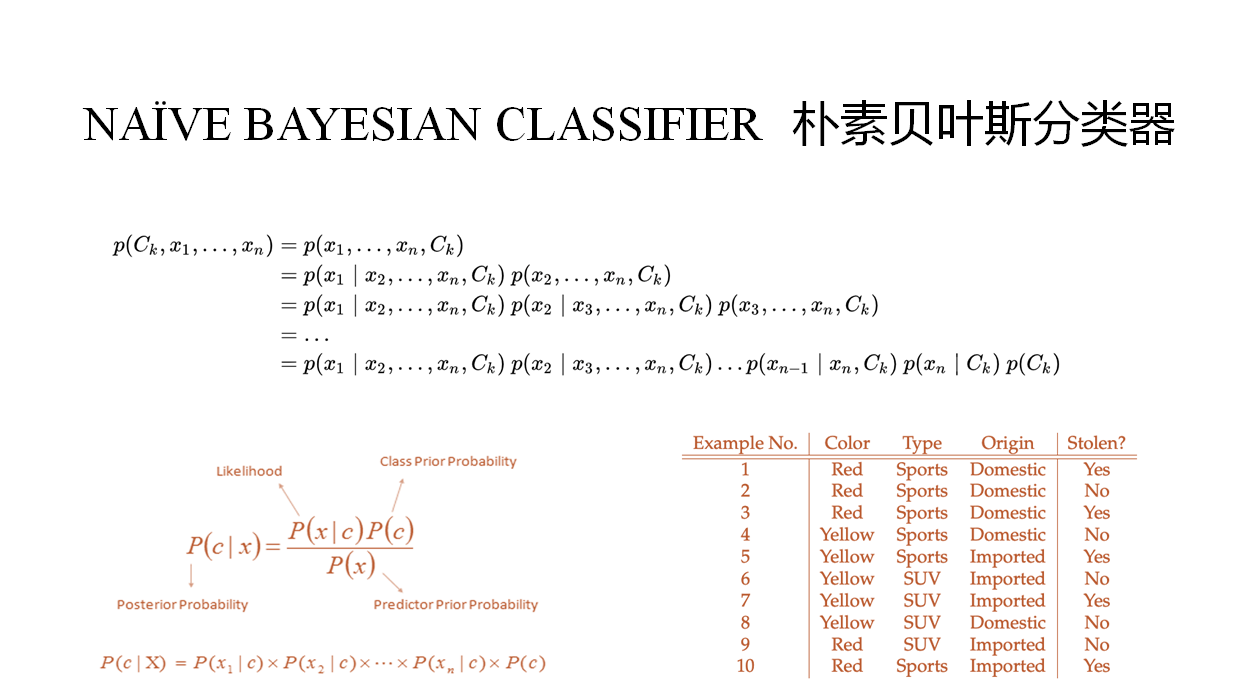

#### 结合上图右下角的车辆被偷历史数据，预测买一辆Yellow,Sports,Imported的车，被偷的概率大还是不被偷的概率大

$\begin{array}{ll}
    &P_r(Yes|Yellow,Sports,Imported)\\
    &=\frac{P_r(Yellow|Yes)*P_r(Sports|Yes)*P_r(Imported|Yes)*P_r(Yes)}{P_r(Yellow,Sports,Imported)}\\
    &=\frac{\frac{2}{5}*\frac{4}{5}*\frac{3}{5}*\frac{1}{2}}{P_r(Yellow,Sports,Imported)}
\end{array}$

$\begin{array}{ll}
    &P_r(No|Yellow,Sports,Imported)\\
    &=\frac{P_r(Yellow|No)*P_r(Sports|No)*P_r(Imported|No)*P_r(No)}{P_r(Yellow,Sports,Imported)}\\
    &=\frac{\frac{3}{5}*\frac{2}{5}*\frac{2}{5}*\frac{1}{2}}{P_r(Yellow,Sports,Imported)}
\end{array}$

$\begin{array}{ll}
    &\frac{P_r(Yes|Yellow,Sports,Imported)}{P_r(No|Yellow,Sports,Imported)}=\frac{2}{1}
\end{array}$

#### 买一辆Yellow,Sports,Imported的车，被偷概率是不被偷概率的两倍

#### Gaussian Bayesian Classifier 高斯贝叶斯分类器
+ 解决连续值的分类问题
+ 连续数据离散化处理，根据高斯公式，把数据变成一段一段的离散数据
+ 中值定理结论：不管分布呈什么分布，只要呈一定分布，当实验重复多次时，都会呈高斯分布
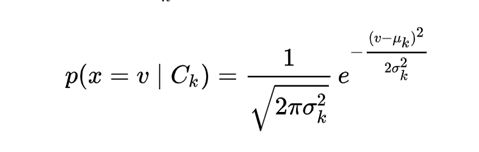

#### 优点：
+ Easy to implement 易于实施
+ It is highly scalable with the number of predictors and data points 当数据量和预测数据量非常大时，仍然可以运行
+ It is fast and can be used to make real-time predictions 速度快，可做实时预测

#### 缺点：
+ It is not sensitive to irrelevant features 对不相关特征不敏感，对关联性不强的特征容易误判，有一定的历史局限性